In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
from sklearn.manifold import TSNE
from sklearn.ensemble import RandomForestClassifier
import seaborn as sns
import multiprocessing as mp

In [2]:
data = pd.read_csv('data/cleaned_data.csv', index_col=0)
data

/home/liampav3/anaconda3/lib/python3.9/site-packages/numpy/lib/arraysetops.py:583: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


,session_id,session_position,session_length,skip_1,skip_2,skip_3,not_skipped,context_switch,no_pause_before_play,short_pause_before_play,...,time_signature,valence,acoustic_vector_0,acoustic_vector_1,acoustic_vector_2,acoustic_vector_3,acoustic_vector_4,acoustic_vector_5,acoustic_vector_6,acoustic_vector_7
0,0.0,0.0,6.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,...,4,0.844416,-0.618357,0.390469,0.448867,0.275075,0.144140,0.088700,0.463565,0.083241
1,0.0,1.0,6.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,...,4,0.190770,0.107488,0.020184,-0.321440,-0.333361,0.339147,0.114609,-0.244465,-0.022434
2,0.0,2.0,6.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,4,0.527292,0.170867,0.156757,-0.176976,-0.464026,0.199530,0.138824,-0.334333,-0.054381
3,0.0,3.0,6.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,...,4,0.688589,-0.829053,0.341095,0.212889,0.149715,-0.266748,-0.039293,-0.168480,0.158022
4,0.0,4.0,6.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,...,4,0.180426,0.010893,0.060761,-0.156753,-0.293929,0.408677,0.115389,-0.345277,-0.153823
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3673815,444490.0,2.0,5.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,...,4,0.218147,-0.816745,0.406897,0.236413,-0.042040,-0.299926,0.034196,-0.566873,0.174116
3673816,444490.0,3.0,5.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,...,4,0.218147,-0.816745,0.406897,0.236413,-0.042040,-0.299926,0.034196,-0.566873,0.174116
3673817,444490.0,4.0,5.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,...,4,0.237295,-0.911444,0.379222,0.236342,0.051040,-0.333735,-0.013265,-0.578796,0.183973
3673818,444490.0,5.0,5.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,...,4,0.380786,-0.568181,0.348701,0.130115,-0.189496,-0.113935,0.110483,-0.502185,0.180847


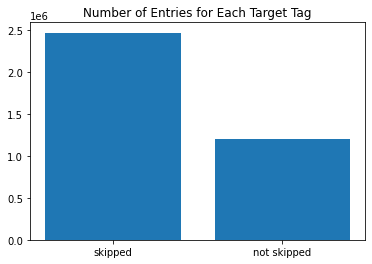

In [3]:
targets_by_class = dict(data['not_skipped'].value_counts())
counts = [targets_by_class[0], targets_by_class[1]]
tags = ['skipped', 'not skipped']
plt.bar(tags, counts)
plt.title('Number of Entries for Each Target Tag')
plt.savefig('by_tag.png', dpi=300)

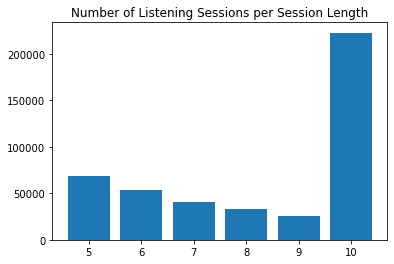

In [4]:
session_lengths = dict(data['session_id'].value_counts()).values()
session_length_counts = Counter(session_lengths)
plt.bar(session_length_counts.keys(), session_length_counts.values())
plt.title("Number of Listening Sessions per Session Length")
plt.savefig('by_session_len.png', dpi=300)

In [5]:
acoustic_vecs = data.filter(regex=('(acoustic_v*|not_skipped)'))
acoustic_vecs

,not_skipped,acoustic_vector_0,acoustic_vector_1,acoustic_vector_2,acoustic_vector_3,acoustic_vector_4,acoustic_vector_5,acoustic_vector_6,acoustic_vector_7
0,0.0,-0.618357,0.390469,0.448867,0.275075,0.144140,0.088700,0.463565,0.083241
1,0.0,0.107488,0.020184,-0.321440,-0.333361,0.339147,0.114609,-0.244465,-0.022434
2,1.0,0.170867,0.156757,-0.176976,-0.464026,0.199530,0.138824,-0.334333,-0.054381
3,0.0,-0.829053,0.341095,0.212889,0.149715,-0.266748,-0.039293,-0.168480,0.158022
4,0.0,0.010893,0.060761,-0.156753,-0.293929,0.408677,0.115389,-0.345277,-0.153823
...,...,...,...,...,...,...,...,...,...
3673815,0.0,-0.816745,0.406897,0.236413,-0.042040,-0.299926,0.034196,-0.566873,0.174116
3673816,0.0,-0.816745,0.406897,0.236413,-0.042040,-0.299926,0.034196,-0.566873,0.174116
3673817,0.0,-0.911444,0.379222,0.236342,0.051040,-0.333735,-0.013265,-0.578796,0.183973
3673818,0.0,-0.568181,0.348701,0.130115,-0.189496,-0.113935,0.110483,-0.502185,0.180847


In [6]:
tsne_sample = acoustic_vecs.sample(10000)
tsne_target = tsne_sample['not_skipped']
tsne_target=tsne_target.replace({0:"Skipped", 1:'Not Skipped'})
tsne_input = tsne_sample.drop('not_skipped', axis=1)
tsne = TSNE()
reduced = tsne.fit_transform(tsne_input)
plot = sns.scatterplot(x=reduced[:, 0], y=reduced[:,1], hue=tsne_target.tolist())
plot.set(title='Acoustic Vector T-SNE Projection Grouped By Skip')
plt.savefig('tsne.png', dpi=300)

NameError: name 'sns' is not defined

In [24]:
data_target = data['not_skipped']
data_train = data.drop(['skip_1', 'skip_2','skip_3', 'not_skipped', 'hist_user_behavior_reason_end', 'mode'], axis=1)
data_features = data_train.columns

forest = RandomForestClassifier(max_depth=10, n_jobs = mp.cpu_count())
forest.fit(data_train, data_target)
importances = forest.feature_importances_

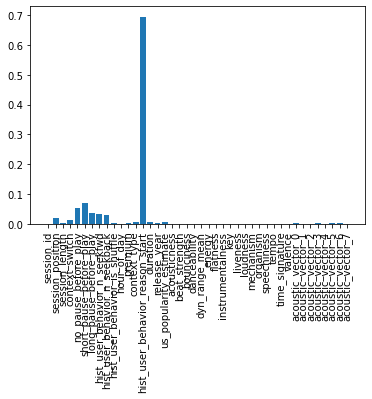

In [25]:
plt.bar(data_features, importances, width=.8)
plt.xticks(rotation=90)
plt.show()